In [46]:
from langgraph.graph import StateGraph, START , END
from typing import TypedDict

In [47]:
class Batsman(TypedDict):
    runs: int
    balls : int
    fours : int
    sixes : int
    
    strike_rate: float
    boundary_percentage: float
    boundary_per_ball: float

In [48]:
def calculate_strike_rate(state : Batsman) :
    strike_rate = (state['runs'] / state['balls']) * 100
    # state['strike_rate'] = strike_rate # Invalid Update error 
    return {"strike_rate": strike_rate}

In [49]:
def calculate_boundary_per_ball(state : Batsman) :
    total_boundaries = state['fours'] + state['sixes']
    boundary_per_ball = total_boundaries / state['balls']
    # state['boundary_per_ball'] = boundary_per_ball # Invalid Update error 
    return {"boundary_per_ball": boundary_per_ball}

In [50]:
def calculate_boundary_percentage(state : Batsman) :
    total_boundaries = state['fours'] + state['sixes']
    boundary_percentage = (total_boundaries / state['balls']) * 100
    # state['boundary_percentage'] = boundary_percentage
    return {"boundary_percentage": boundary_percentage}

In [51]:
def summary(state : Batsman) :
    summary = f"""
    Runs: {state['runs']}
    Balls: {state['balls']}
    Fours: {state['fours']}
    Sixes: {state['sixes']}
    Strike Rate: {state['strike_rate']:.2f}
    Boundary Percentage: {state['boundary_percentage']:.2f}%
    Boundaries per Ball: {state['boundary_per_ball']:.4f}
    """
    # state['summary'] = summary
    return {"summary": summary}

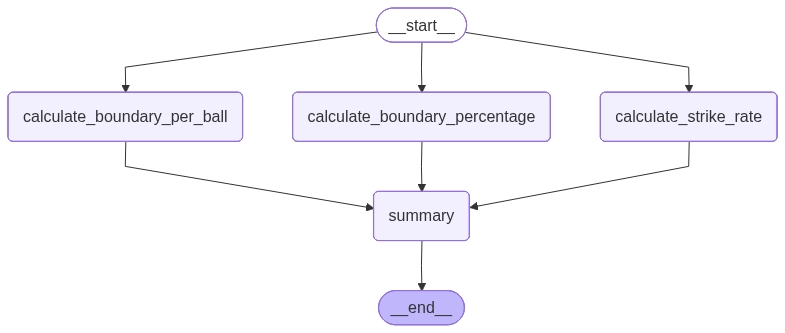

In [52]:
graph = StateGraph(Batsman)

graph.add_node("calculate_strike_rate",calculate_strike_rate)
graph.add_node("calculate_boundary_per_ball", calculate_boundary_per_ball)
graph.add_node("calculate_boundary_percentage", calculate_boundary_percentage)
graph.add_node("summary", summary)


#Edges
graph.add_edge(START,"calculate_strike_rate")
graph.add_edge(START,"calculate_boundary_percentage")
graph.add_edge(START,"calculate_boundary_per_ball")

graph.add_edge("calculate_strike_rate","summary")
graph.add_edge("calculate_boundary_percentage","summary")
graph.add_edge("calculate_boundary_per_ball","summary")

graph.add_edge("summary",END)
workflow = graph.compile()
workflow

In [23]:
initial_state = {
    "runs": 120,
    "balls": 80,
    "fours": 15,
    "sixes": 5
}
final_state = workflow.invoke(initial_state)
print("Workflow completed.")

InvalidUpdateError: At key 'runs': Can receive only one value per step. Use an Annotated key to handle multiple values.
For troubleshooting, visit: https://docs.langchain.com/oss/python/langgraph/errors/INVALID_CONCURRENT_GRAPH_UPDATE

In [55]:
initial_state = {
    "runs": 120,
    "balls": 80,
    "fours": 15,
    "sixes": 5
}
final_state = workflow.invoke(initial_state)
print(final_state)

{'runs': 120, 'balls': 80, 'fours': 15, 'sixes': 5, 'strike_rate': 150.0, 'boundary_percentage': 25.0, 'boundary_per_ball': 0.25}


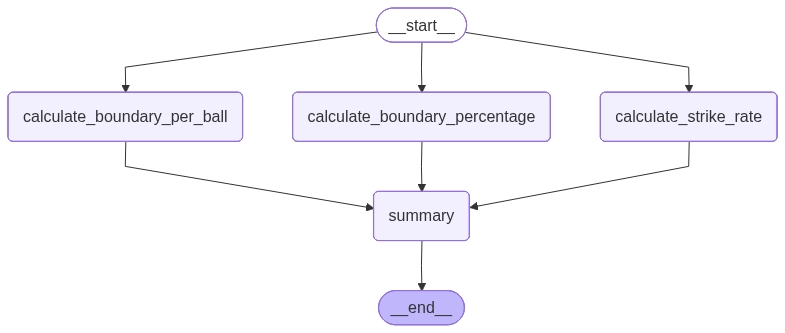

In [56]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())